In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from prince import MCA
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

In [84]:
admit_data = pd.read_csv("../datasets/Admission and Test Scores/ADM_2015-2021_data.csv", low_memory=False)

In [73]:
missing = admit_data.isna().sum()
missing /= admit_data.shape[0]
missing *=100
missing = missing.to_frame().rename(columns={0:'Percent Of Missing Values'})
missing

,Percent Of Missing Values
unitid,0.000000
admcon1,0.000000
admcon2,0.000000
admcon3,0.000000
admcon4,0.000000
admcon5,0.000000
admcon6,0.000000
admcon7,0.000000
admcon8,0.000000
admcon9,0.000000


In [181]:
admit_data = admit_data.dropna(subset=['admcon9'])
categorical = admit_data[['unitid', 'admcon1', 'admcon2', 'admcon3', 'admcon4', 'admcon5', 'admcon6', 'admcon7', 'admcon8', 'admcon9']]
categorical_unique = categorical.drop_duplicates(subset='unitid')


In [87]:
categorical_unique_wo_id = categorical_unique.drop('unitid', axis=1)

In [88]:
for c in categorical_unique_wo_id.columns:
    print(f"Column: {c}, nunique: {categorical_unique_wo_id[c].nunique()}")

Column: admcon1, nunique: 4
Column: admcon2, nunique: 4
Column: admcon3, nunique: 4
Column: admcon4, nunique: 4
Column: admcon5, nunique: 4
Column: admcon6, nunique: 5
Column: admcon7, nunique: 4
Column: admcon8, nunique: 4
Column: admcon9, nunique: 5


In [91]:
mca = MCA(n_components = 20, n_iter = 3, random_state = 101)
mca.fit(categorical_unique_wo_id)
cat_mca = mca.transform(categorical_unique_wo_id)
cat_mca = pd.concat([categorical_unique['unitid'], cat_mca], axis = 1)
print(f"Explained variance: {np.sum(mca.explained_inertia_)}")


Explained variance: 0.8309043967287372


In [239]:
numerical_data = admit_data.drop(['admcon1', 'admcon2', 'admcon3', 'admcon4', 'admcon5', 'admcon6', 'admcon7', 'admcon8', 'admcon9'], axis = 1, inplace = False)
numerical_data_unique = numerical_data.groupby(['unitid']).mean()
numerical_data_unique.dropna(subset=['admssn'])

,applcn,applcnm,applcnw,admssn,admssnm,admssnw,enrlt,enrlm,enrlw,enrlft,...,actcm25,actcm75,acten25,acten75,actmt25,actmt75,satwr25,satwr75,actwr25,year
unitid,,,,,,,,,,,,,,,,,,,,,
100654,8455.142857,2970.571429,5483.714286,7153.428571,2449.428571,4703.142857,1537.142857,632.000000,904.857143,1512.142857,...,15.571429,19.285714,14.000000,20.000000,15.000000,18.0,370.0,457.0,NaN,2018.0
100663,9018.000000,3224.142857,5793.857143,7046.428571,2510.428571,4536.000000,2165.000000,799.000000,1366.000000,2111.571429,...,21.714286,28.857143,22.142857,31.428571,19.857143,26.0,NaN,NaN,NaN,2018.0
100706,4817.000000,2572.857143,2244.142857,3791.857143,2137.714286,1654.142857,1297.714286,817.714286,480.000000,1286.714286,...,24.571429,30.857143,24.428571,33.000000,23.571429,29.0,NaN,NaN,NaN,2018.0
100724,7387.000000,2329.571429,4957.714286,5943.285714,1805.571429,4039.285714,1012.285714,369.714286,642.571429,980.428571,...,15.285714,19.571429,13.857143,19.857143,14.714286,17.0,NaN,NaN,NaN,2018.0
100751,38622.428571,14712.428571,23910.000000,25567.285714,9786.000000,15781.285714,7100.571429,3029.000000,4071.571429,7067.714286,...,22.571429,31.142857,22.571429,33.000000,20.857143,29.0,480.0,600.0,7.0,2018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496681,599.000000,29.000000,570.000000,185.000000,7.000000,178.000000,185.000000,7.000000,178.000000,185.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021.0
496973,27.000000,3.000000,24.000000,26.000000,3.000000,23.000000,18.000000,2.000000,16.000000,17.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021.0
497037,41.000000,3.000000,38.000000,41.000000,3.000000,38.000000,32.000000,2.000000,30.000000,23.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021.0


In [104]:
def get_missing(df):
    missing = df.isna().sum()
    missing /= df.shape[0]
    missing *= 100
    missing = missing.to_frame().rename(columns={0: 'Percent Missing Values'})
    return missing

In [264]:
numerical_data_unique_clean = numerical_data_unique.copy()

In [197]:
def backcalc_and_update_mwt(df, w, m, t):

    df[w].fillna(df[t] - df[m], inplace = True)
    df[m].fillna(df[t] - df[w], inplace = True)
    df[t].fillna(df[m] + df[w], inplace = True)


In [155]:
def update_sat_act(df, sat, act):
    
    df[sat].fillna(pd.Series(np.int32(1200/36 * df[act] + 400)), inplace = True)
    df[act].fillna(pd.Series(np.int32(36.0/1600.0 * df[sat])), inplace = True)

In [265]:
backcalc_and_update_mwt(numerical_data_unique_clean, 'admssnw', 'admssnm', 'admssn')
backcalc_and_update_mwt(numerical_data_unique_clean, 'enrlw', 'enrlm', 'enrlt')
backcalc_and_update_mwt(numerical_data_unique_clean, 'enrlftw', 'enrlftm', 'enrlft')
backcalc_and_update_mwt(numerical_data_unique_clean, 'enrlptw', 'enrlptm', 'enrlpt')

numerical_data_unique_clean['enrlptw'].fillna(0, inplace=True)
numerical_data_unique_clean['enrlpt'].fillna(0, inplace=True)
numerical_data_unique_clean['enrlptm'].fillna(0, inplace=True)

numerical_data_unique_clean['enrlftw'].fillna(0, inplace=True)
numerical_data_unique_clean['enrlft'].fillna(0, inplace=True)
numerical_data_unique_clean['enrlftm'].fillna(0, inplace=True)

numerical_data_unique_clean['enrlt'].fillna(0, inplace=True)
numerical_data_unique_clean['enrlm'].fillna(0, inplace=True)
numerical_data_unique_clean['enrlw'].fillna(0, inplace=True)

numerical_data_unique_clean['admssn'].fillna(0, inplace=True)
numerical_data_unique_clean['admssnm'].fillna(0, inplace=True)
numerical_data_unique_clean['admssnw'].fillna(0, inplace=True)

numerical_data_unique_clean.drop('satnum', axis = 1, inplace = True)
numerical_data_unique_clean.drop('actnum', axis = 1, inplace = True)
numerical_data_unique_clean.drop('actwr25', axis = 1, inplace = True)
numerical_data_unique_clean.drop('satwr75', axis = 1, inplace = True)
numerical_data_unique_clean.drop('satwr25', axis = 1, inplace = True)
numerical_data_unique_clean.drop('actmt75', axis = 1, inplace = True)

update_sat_act(numerical_data_unique_clean, 'satvr25', 'actcm25')
update_sat_act(numerical_data_unique_clean, 'satvr75', 'actcm75')

In [266]:
imp = IterativeImputer(missing_values=np.nan, estimator = RandomForestRegressor(n_estimators=4,
        max_depth=10,
        bootstrap=True,
        max_samples=0.5,
        n_jobs=2,
        random_state=0,), tol = 1e-2, max_iter = 25)

imp.fit(numerical_data_unique_clean)


IterativeImputer(estimator=RandomForestRegressor(max_depth=10, max_samples=0.5,
                                                 n_estimators=4, n_jobs=2,
                                                 random_state=0),
                 max_iter=25, tol=0.01)

In [267]:
numerical_data_unique_clean_imp = pd.DataFrame(imp.transform(numerical_data_unique_clean), columns=numerical_data_unique_clean.columns, index = numerical_data_unique_clean.index)

In [268]:
# cat_mca.reset_index()
numerical_data_unique_clean_imp.reset_index(inplace=True)

In [259]:
cat_mca.index.name = 'index'
numerical_data_unique_clean_imp.index.name = 'smh'

In [269]:
numerical_data_unique_clean_imp.columns

Index(['unitid', 'applcn', 'applcnm', 'applcnw', 'admssn', 'admssnm',
       'admssnw', 'enrlt', 'enrlm', 'enrlw', 'enrlft', 'enrlftm', 'enrlftw',
       'enrlpt', 'enrlptm', 'enrlptw', 'satpct', 'actpct', 'satvr25',
       'satvr75', 'satmt25', 'satmt75', 'actcm25', 'actcm75', 'acten25',
       'acten75', 'actmt25', 'year'],
      dtype='object')

In [250]:
def print_id_row(df):
    print(f"Rows: {df.shape[0]}, nunique: {df['unitid'].nunique()}")

In [270]:
print_id_row(cat_mca)
print_id_row(numerical_data_unique_clean_imp)

Rows: 2487, nunique: 2487
Rows: 2487, nunique: 2487


In [277]:
all_features = pd.merge(cat_mca, numerical_data_unique_clean_imp, on = 'unitid')
all_features.drop('unitid', axis = 1, inplace=  True)

In [297]:
all_features

,0,1,2,3,4,5,6,7,8,9,...,satvr25,satvr75,satmt25,satmt75,actcm25,actcm75,acten25,acten75,actmt25,year
0,-0.618298,-0.476738,-0.045752,0.051051,-0.474091,-0.283476,-0.078860,0.013481,0.013899,-0.052483,...,406.857143,499.285714,391.428571,495.000000,15.571429,19.285714,14.000000,20.000000,15.000000,2018.0
1,0.082539,-0.096697,-0.240784,-0.322039,0.415511,-0.177100,-0.015992,-0.062976,-0.134512,0.002829,...,520.428571,649.714286,527.142857,677.285714,21.714286,28.857143,22.142857,31.428571,19.857143,2018.0
2,-0.289783,-0.502218,0.136296,-0.264998,-0.408769,0.321037,-0.023282,0.265250,0.180017,-0.208887,...,562.428571,684.285714,551.428571,704.285714,24.571429,30.857143,24.428571,33.000000,23.571429,2018.0
3,0.230308,-0.177094,-0.310104,-0.022024,0.538908,0.042509,0.282365,-0.247892,0.132715,0.071825,...,412.857143,498.571429,392.571429,493.571429,15.285714,19.571429,13.857143,19.857143,14.714286,2018.0
4,-0.445894,-0.325682,-0.247590,-0.309215,0.228190,-0.097298,0.030577,-0.145733,-0.288170,0.014347,...,525.714286,641.428571,515.714286,650.000000,22.571429,31.142857,22.571429,33.000000,20.857143,2018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2482,0.222141,-0.408380,2.033412,0.458679,1.123240,-0.057156,-0.355773,-0.091576,0.216772,0.142191,...,486.948095,573.042857,451.607143,571.973214,20.037554,25.241336,19.528118,25.485833,17.893918,2015.0
2483,0.222141,-0.408380,2.033412,0.458679,1.123240,-0.057156,-0.355773,-0.091576,0.216772,0.142191,...,491.948095,585.709524,451.607143,579.473214,20.037554,25.241336,19.093197,25.258753,18.803673,2015.0
2484,0.222141,-0.408380,2.033412,0.458679,1.123240,-0.057156,-0.355773,-0.091576,0.216772,0.142191,...,491.948095,585.709524,451.607143,579.473214,20.037554,25.241336,19.093197,25.258753,18.803673,2015.0
2485,0.222141,-0.408380,2.033412,0.458679,1.123240,-0.057156,-0.355773,-0.091576,0.216772,0.142191,...,491.948095,585.709524,451.607143,579.473214,20.037554,25.241336,19.093197,25.258753,18.803673,2015.0


In [278]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(all_features)
normalized_all_features = scaler.transform(all_features)

C:\Users\dragonblade62\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\dragonblade62\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [279]:
from sklearn.decomposition import PCA
pca = PCA(n_components=15)
pca.fit(normalized_all_features)
print(np.sum(pca.explained_variance_ratio_))
print(pca.explained_variance_ratio_)

0.7675877784730802
[0.29685603 0.13311838 0.05563148 0.03761626 0.03012958 0.02213395
 0.02155366 0.02142258 0.02138315 0.02132734 0.02128905 0.02128476
 0.02128179 0.02128039 0.02127937]


In [280]:
pca_all_features = pca.transform(normalized_all_features)

In [288]:
from scipy import stats
pca_no_outliers = pca_all_features[(np.abs(stats.zscore(pca_all_features)) < 3).all(axis=1)]
X = pca_no_outliers

In [293]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3)
yhat = gmm.fit_predict(X)

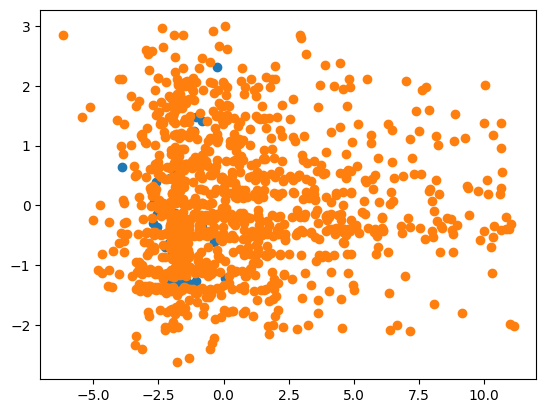

In [319]:
cluster1 = X[color == 0]
cluster2 = X[color == 2]
first_i = 0
second_i = 9
plt.scatter(cluster1[:, first_i], cluster1[:, second_i])
plt.scatter(cluster2[:, first_i], cluster2[:, second_i])


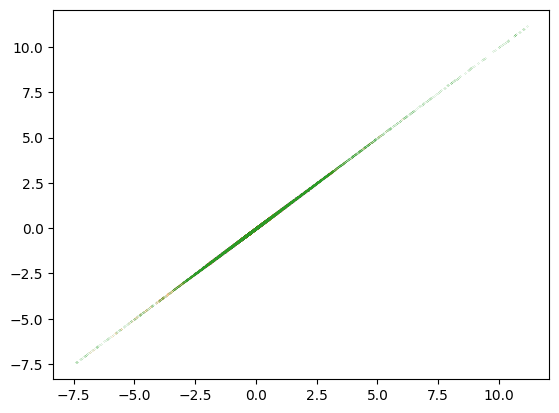

In [310]:
clusters = np.unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(yhat == cluster)
    plt.scatter(X[row_ix], X[row_ix], s = 0.01)

plt.show()

In [285]:
def plot3D(px,py,pz,clist,emphPoints = [],cmap='plasma',title='',shadow=False, useCMAP = True,xLabel='',yLabel='',zLabel='',savefig='',saveN = 1, setRange = 0):
    
    elev = 30
    azim = 60

    viewVect = [np.cos(np.pi*180/elev)*np.sin(np.pi*180/azim),np.cos(np.pi*180/elev)*np.cos(np.pi*180/azim),np.cos(np.pi*180/elev)]
    
    thetalist = np.linspace(0,2*np.pi,saveN + 1)
    thetalist = thetalist[:-1]
    
    projMat = np.array([px,py])

    s = ''
    
    for idx in range(saveN):
        theta = thetalist[idx]
        rotMat = np.array([[np.cos(theta),-np.sin(theta)],[np.sin(theta),np.cos(theta)]])
        
        rotx,roty = np.dot(rotMat,projMat)
        rotz = pz
        clistRot = clist
        
        p = np.array([rotx,roty,rotz])
        dots = np.array(np.dot(viewVect,p))
        sort = dots.argsort()

        fig, ax = plt.subplots(figsize = (10,10))
        
        ax.set_alpha(0)
        ax.axis('off')

        ax = fig.add_subplot(projection='3d')

        ax.patch.set_alpha(0)

        Xdist = px.max() - px.min()
        Xcntr = (px.max() + px.min())/2.0
        Ydist = py.max() - py.min()
        Ycntr = (py.max() + py.min())/2.0
        Zdist = pz.max() - pz.min()
        Zcntr = (pz.max() + pz.min())/2.0

        if setRange == 0:
            dist = 0.55*max(Xdist,Ydist,Zdist)
        else:
            dist = 0.55*setRange

        for p in emphPoints:
            ax.scatter([rotx[p]],[roty[p]],[rotz[p]],c='C1',s=200)
            if shadow:
                ax.scatter([rotx[p]],[roty[p]],[Zcntr - dist],c='black',alpha=0.5)
                ax.scatter([rotx[p]],[Ycntr + dist],[rotz[p]],c='black',alpha=0.5)
                ax.scatter([Xcntr - dist],[roty[p]],[rotz[p]],c='black',alpha=0.5)
        
        rotx = rotx[sort]
        roty = roty[sort]
        rotz = rotz[sort]
        clistRot = np.array(clistRot)[sort]
        
        if useCMAP:
            s = ax.scatter(rotx,roty,rotz,c=clistRot,s = 3, linewidth=0.2,cmap = cmap)
        else:
            s = ax.scatter(rotx,roty,rotz,c=clistRot,s = 3, linewidth=0.2)


        ax.set_xlim([Xcntr - dist, Xcntr + dist])
        ax.set_ylim([Ycntr - dist, Ycntr + dist])
        ax.set_zlim([Zcntr - dist, Zcntr + dist])

        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_zticks([])

        #ax.set_axis_off()
        #plt.show()

        if shadow:
            #fig = plt.figure(figsize = (10,10))
            #ax = fig.gca(projection='3d')
            ax.view_init(30,-60)

            ax.scatter(rotx,roty,[Zcntr - dist for p in rotz],c='black',s=3, alpha=0.01)
            ax.scatter(rotx,[Ycntr + dist for p in roty],rotz,c='black',s=3,alpha=0.01)
            ax.scatter([Xcntr - dist for p in rotx],roty,rotz,c='black',s=3,alpha=0.01)

            ax.set_xlim([Xcntr - dist, Xcntr + dist])
            ax.set_ylim([Ycntr - dist, Ycntr + dist])
            ax.set_zlim([Zcntr - dist, Zcntr + dist])

            ax.set_xticks([])
            ax.set_yticks([])
            ax.set_zticks([])

            #ax.set_axis_off()
        ax.set_xlabel(xLabel,fontsize=16)
        ax.set_ylabel(yLabel,fontsize=16)
        ax.set_zlabel(zLabel,fontsize=16)
        
        
        if title == '':
            pass
        else:
            plt.title(title,fontsize=30)

        if savefig == '':
            cb = plt.colorbar(s)
            plt.show()
        else:
            cb = plt.colorbar(s)
            plt.savefig(savefig+str(idx)+'.png')
            plt.close()
  
def trianglePlot(arry,clist,emphPoints = [],dim=2):  
  ranges = [arry[:,idx].max()-arry[:,idx].min() for idx in range(dim+1)]
  axesDist = 0.6*max(ranges)
  
  figs,axs = plt.subplots(nrows=dim,ncols=dim,figsize=(15,15))
  for row in range(dim-1,-1,-1):
      for col in range(dim-1,-1,-1):
          if col >= row:
              py = arry[:,row]
              px = arry[:,col+1]
              
              centerX = (px.max()+px.min())/2
              centerY = (py.max()+py.min())/2
              
              sc1 = axs[row,col].scatter(px,py,s=5,c=clist,edgecolor='black',linewidth=0.2, cmap='plasma')
              for p in emphPoints:
                  axs[row,col].scatter([px[0]],[py[0]],s=100,c='C1',edgecolor='black',linewidth=0.2)
              
              axs[row,col].set_xlim([centerX-axesDist,centerX+axesDist])
              axs[row,col].set_ylim([centerY-axesDist,centerY+axesDist])
              if row != col:
                  axs[row,col].set_xticks([])
                  axs[row,col].set_yticks([])
              if row == col:
                  axs[row,col].set_ylabel('direction '+str(row+1))
                  axs[row,col].set_xlabel('direction '+str(col+2))
                  
              axs[row,col].ticklabel_format(style='sci',scilimits=(-2,2),axis='both')
          else:
              axs[row,col].axis('off')
  plt.subplots_adjust(wspace=0, hspace=0)
  plt.show()
    

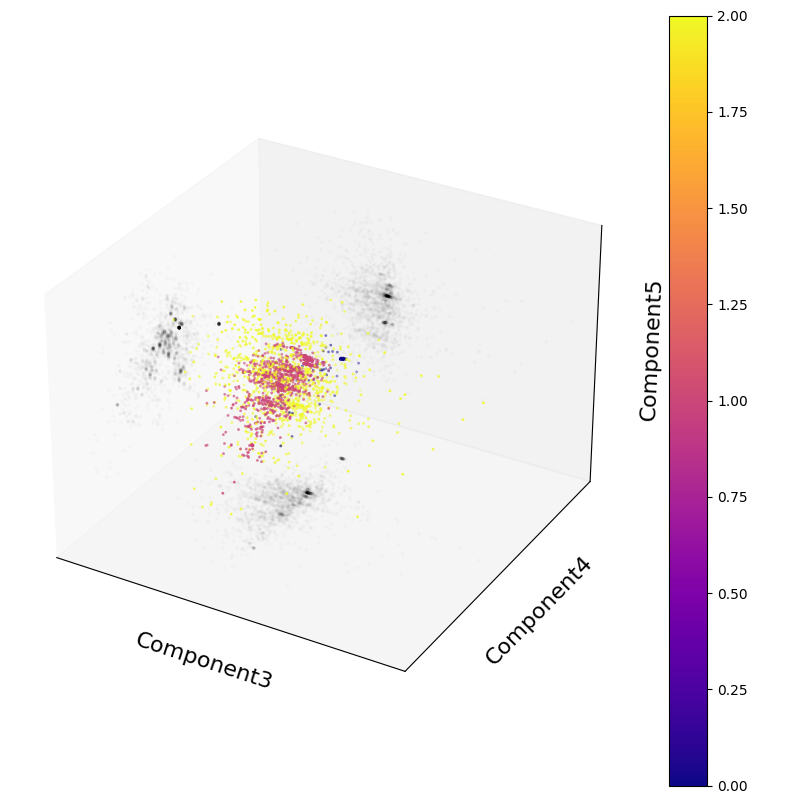

In [305]:
color = yhat

plot3D(X[:,2], X[:,14], X[:,7], color, shadow=True, xLabel = 'Component3', yLabel = 'Component4', zLabel = 'Component5')